In [ ]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, mean_squared_error


In [4]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

print("X.shape: %s y.shape: %s" % (str(X.shape), str(y.shape)))
print("num_classes: %d" % len(np.unique(y)))

X.shape: (150, 4) y.shape: (150,)
num_classes: 3


### Exemplo de SVC
- kernel="rbf" é o padrão

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("X_train.shape: %s y_train.shape: %s" % (str(X_train.shape), str(y_train.shape)))
print("X_test.shape: %s y_test.shape: %s" % (str(X_test.shape), str(y_test.shape)))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train.shape: (120, 4) y_train.shape: (120,)
X_test.shape: (30, 4) y_test.shape: (30,)


In [13]:
svc_linear = SVC()
svc_linear.fit(X_train_scaled, y_train)

y_pred = svc_linear.predict(X_test_scaled)

print("accuracy: %f" % accuracy_score(y_test, y_pred))

accuracy: 0.966667


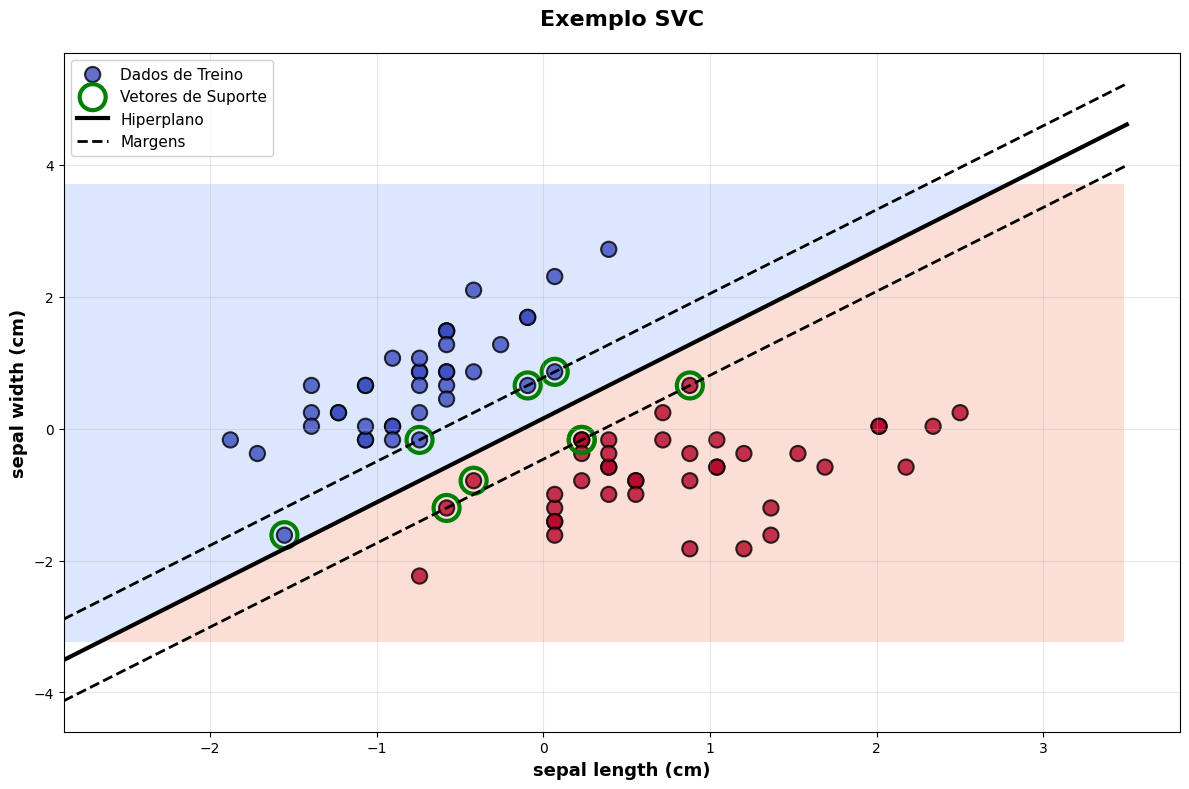

In [ ]:
plt.figure(figsize=(12, 8))

x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svc_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm", levels=[-0.5, 0.5, 1.5])

scatter = plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], 
                      c=y_train, cmap="coolwarm", s=120, 
                      edgecolors="black", linewidth=1.5, alpha=0.8,
                      label="Dados de Treino")

support_vectors = svc_linear.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], 
           s=350, linewidth=3, facecolors="none", 
           edgecolors="green", label="Vetores de Suporte")

w = svc_linear.coef_[0]
b = svc_linear.intercept_[0]
x_plot = np.linspace(x_min, x_max, 100)

y_plot = -(w[0] * x_plot + b) / w[1]

margin_up = -(w[0] * x_plot + b - 1) / w[1]
margin_down = -(w[0] * x_plot + b + 1) / w[1]

plt.plot(x_plot, y_plot, "k-", linewidth=3, label="Hiperplano")
plt.plot(x_plot, margin_up, "k--", linewidth=2, label="Margens")
plt.plot(x_plot, margin_down, "k--", linewidth=2)

plt.xlabel(iris.feature_names[0], fontsize=13, fontweight="bold")
plt.ylabel(iris.feature_names[1], fontsize=13, fontweight="bold")
plt.title("Exemplo SVC", fontsize=16, fontweight="bold", pad=20)
plt.legend(loc="upper left", fontsize=11, framealpha=0.9)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Exemplo de SVR

In [33]:
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()

y = y + (0.2 * np.random.randn(100))

split = 80
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("X_train.shape: %s y_train.shape: %s" % (str(X_train.shape), str(y_train.shape)))
print("X_test.shape: %s y_test.shape: %s" % (str(X_test.shape), str(y_test.shape)))

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

X_train.shape: (80, 1) y_train.shape: (80,)
X_test.shape: (20, 1) y_test.shape: (20,)


In [ ]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_rbf.fit(X_train_scaled, y_train_scaled)
y_rbf_pred_scaled = svr_rbf.predict(X_test_scaled)
y_rbf_pred = scaler_y.inverse_transform(y_rbf_pred_scaled.reshape(-1, 1)).ravel()
mse = mean_squared_error(y_test, y_pred)
print("mse:  %f" % mse)

mse:  0.291563


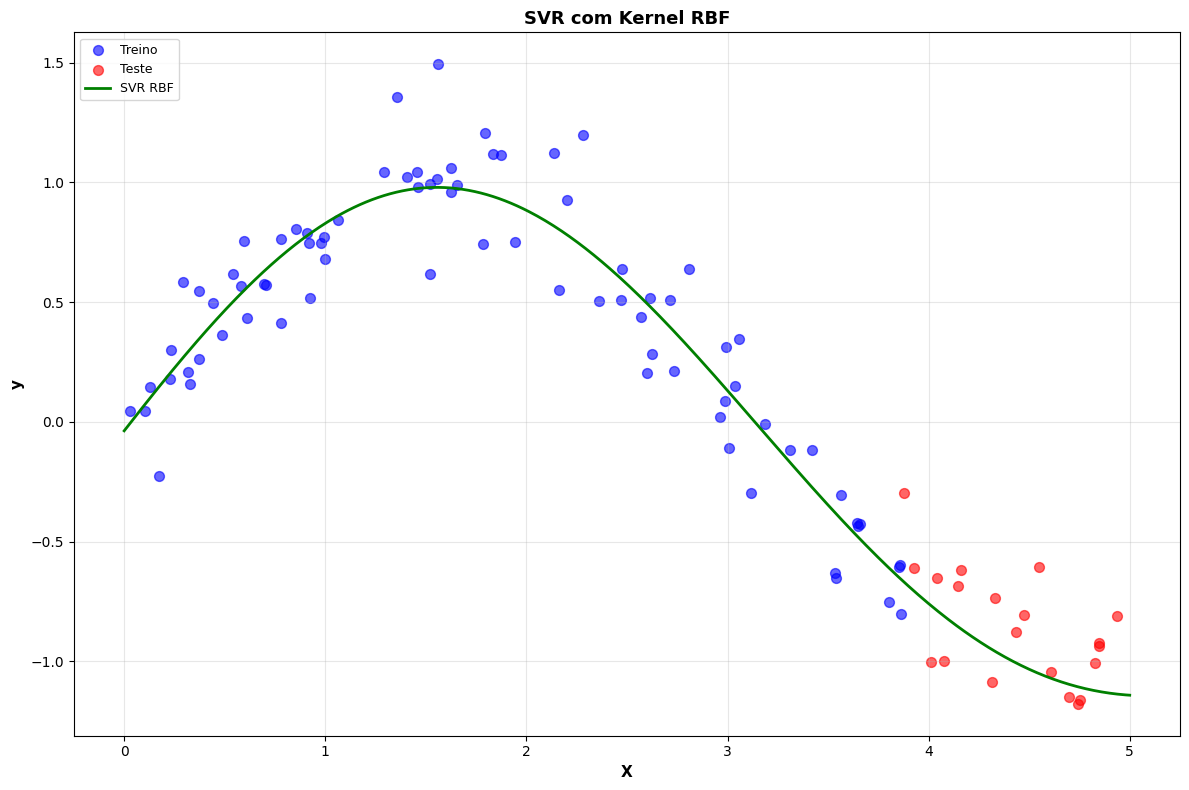

In [32]:
X_plot = np.linspace(0, 5, 500).reshape(-1, 1)
X_plot_scaled = scaler_X.transform(X_plot)
y_rbf_plot_scaled = svr_rbf.predict(X_plot_scaled)
y_rbf_plot = scaler_y.inverse_transform(y_rbf_plot_scaled.reshape(-1, 1)).ravel()

fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(X_train, y_train, c="blue", s=50, alpha=0.6, label="Treino")
ax.scatter(X_test, y_test, c="red", s=50, alpha=0.6, label="Teste")
ax.plot(X_plot, y_rbf_plot, "g-", linewidth=2, label="SVR RBF")
ax.set_xlabel("X", fontsize=11, fontweight="bold")
ax.set_ylabel("y", fontsize=11, fontweight="bold")
ax.set_title("SVR com Kernel RBF", fontsize=13, fontweight="bold")
ax.legend(loc="upper left", fontsize=9)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
